# IS318 - Machine Learning

## TP3 - SVM and bag of features

In this TP, we will experiment with SVM classifiers. We will also work with K-Means clustering. We will apply these methods to a classical image classification approach called **bag of features**.

In [49]:
import sklearn
import sklearn.cluster
import sklearn.datasets
import sklearn.model_selection
import skimage.feature
import skimage.io
import skimage.exposure
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

### 1. Introduction to SVM

In `scikit-learn` there exists several implementations of SVM. In this TP, we will use the `sklearn.svm.SVC` version, which allows to easily change the kernel used.

We will work a dataset of small images of faces called **Olivetti faces**. It is composed of 400 images of size 64x64, depicting 40 different persons.

In [50]:
olivetti_faces_dataset = sklearn.datasets.fetch_olivetti_faces()

**(Question)** Access the images and labels and set up an appropriate cross validation protocol.

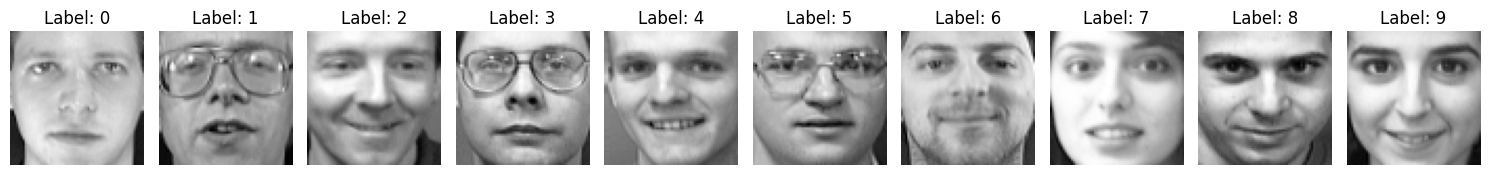

In [51]:
X = olivetti_faces_dataset.data
y = olivetti_faces_dataset.target

n_samples = 10
fig, axes = plt.subplots(1, n_samples, figsize=(15, 5))

for i in range(n_samples):
    axes[i].imshow(X[i*10].reshape(64, 64), cmap='gray')
    axes[i].set_title(f"Label: {y[i*10]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

def k_fold_cross_validation(X, y, model, k=5):
    n_samples = X.shape[0]
    fold_size = n_samples // k
    accuracies = []
    
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for fold in range(k):
        start, end = fold * fold_size, (fold + 1) * fold_size
        valid_indices = indices[start:end]
        train_indices = np.concatenate([indices[:start], indices[end:]])
        
        X_train, y_train = X[train_indices], y[train_indices]
        X_valid, y_valid = X[valid_indices], y[valid_indices]
    
        model.fit(X_train, y_train)
    
        y_pred = model.predict(X_valid)
        accuracy = np.mean(y_pred == y_valid)
        accuracies.append(accuracy)
    
    avg_accuracy = np.mean(accuracies)
    return avg_accuracy

**(Question)** Train a multi-class linear SVM classifier on this dataset with your cross-validation protocol. Report the classification accuracy on the validation/test set(s).

In [52]:
model = sklearn.svm.SVC(C=1, kernel="rbf")
print(k_fold_cross_validation(X, y, model, k=5))

0.8799999999999999


**(Question)** Experiment with different hyperparameters (notably the soft margin parameter $C$) and different kernels. Compare the results.

In [53]:
model = sklearn.svm.SVC(C=1, kernel="rbf")
print("kernel=rbf     C=1  k=5 | ", f"{k_fold_cross_validation(X, y, model, k=5):.4f}")

model = sklearn.svm.SVC(C=10, kernel="rbf")
print("kernel=rbf     C=10 k=5 | ", f"{k_fold_cross_validation(X, y, model, k=5):.4f}")

model = sklearn.svm.SVC(C=1, kernel="linear")
print("kernel=linear  C=1  k=5 | ", f"{k_fold_cross_validation(X, y, model, k=5):.4f}")

model = sklearn.svm.SVC(C=10, kernel="linear")
print("kernel=linear  C=10 k=5 | ", f"{k_fold_cross_validation(X, y, model, k=5):.4f}")

model = sklearn.svm.SVC(C=1, kernel="poly")
print("kernel=poly    C=1  k=5 | ", f"{k_fold_cross_validation(X, y, model, k=5):.4f}")

model = sklearn.svm.SVC(C=10, kernel="poly")
print("kernel=poly    C=10 k=5 | ", f"{k_fold_cross_validation(X, y, model, k=5):.4f}")

model = sklearn.svm.SVC(C=1, kernel="sigmoid")
print("kernel=sigmoid C=1  k=5 | ", f"{k_fold_cross_validation(X, y, model, k=5):.4f}")

model = sklearn.svm.SVC(C=10, kernel="sigmoid")
print("kernel=sigmoid C=10 k=5 | ", f"{k_fold_cross_validation(X, y, model, k=5):.4f}")

model = sklearn.svm.SVC(C=1, kernel="rbf")
print("kernel=rbf     C=1  k=10| ", f"{k_fold_cross_validation(X, y, model, k=10):.4f}")

model = sklearn.svm.SVC(C=10, kernel="rbf")
print("kernel=rbf     C=10 k=10| ", f"{k_fold_cross_validation(X, y, model, k=10):.4f}")

model = sklearn.svm.SVC(C=1, kernel="linear")
print("kernel=linear  C=1  k=10| ", f"{k_fold_cross_validation(X, y, model, k=10):.4f}")

model = sklearn.svm.SVC(C=10, kernel="linear")
print("kernel=linear  C=10 k=10| ", f"{k_fold_cross_validation(X, y, model, k=10):.4f}")

model = sklearn.svm.SVC(C=1, kernel="poly")
print("kernel=poly    C=1  k=10| ", f"{k_fold_cross_validation(X, y, model, k=10):.4f}")

model = sklearn.svm.SVC(C=10, kernel="poly")
print("kernel=poly    C=10 k=10| ", f"{k_fold_cross_validation(X, y, model, k=10):.4f}")

model = sklearn.svm.SVC(C=1, kernel="sigmoid")
print("kernel=sigmoid C=1  k=10| ", f"{k_fold_cross_validation(X, y, model, k=10):.4f}")

model = sklearn.svm.SVC(C=10, kernel="sigmoid")
print("kernel=sigmoid C=10 k=10| ", f"{k_fold_cross_validation(X, y, model, k=10):.4f}")

kernel=rbf     C=1  k=5 |  0.9175
kernel=rbf     C=10 k=5 |  0.9425
kernel=linear  C=1  k=5 |  0.9725
kernel=linear  C=10 k=5 |  0.9600
kernel=poly    C=1  k=5 |  0.9600
kernel=poly    C=10 k=5 |  0.9550
kernel=sigmoid C=1  k=5 |  0.0000
kernel=sigmoid C=10 k=5 |  0.0000
kernel=rbf     C=1  k=10|  0.9475
kernel=rbf     C=10 k=10|  0.9700
kernel=linear  C=1  k=10|  0.9800
kernel=linear  C=10 k=10|  0.9725
kernel=poly    C=1  k=10|  0.9675
kernel=poly    C=10 k=10|  0.9700
kernel=sigmoid C=1  k=10|  0.0000
kernel=sigmoid C=10 k=10|  0.0000


* Use a higher soft margin seems to improve the accuracy of the models in this case.
* The linear kernel and the rbf seems to be the better kernels (depending on the training set) with a K of 10

### 2. Scenes dataset

For the rest of the TP, to experiment with bag of features, we will work with the 8-scenes dataset originally from: https://people.csail.mit.edu/torralba/code/spatialenvelope/

It is provided as an archive file with this TP.

The function below can be used to load the dataset images and labels:

In [54]:
def load_scenes():
    '''Return images and labels of the scenes dataset.'''
    images = skimage.io.ImageCollection('scenes/*.jpg')
    labels_names = [f.split('/')[-1].split('_')[0] for f in images.files]
    unique_labels = sorted(list(set(labels_names)))
    labels_dict = {label: i + 1 for (i, label) in enumerate(unique_labels)}
    labels = np.array([labels_dict[label] for label in labels_names])
    return images, labels, list(labels_dict.keys())

**(Question)** Load the dataset and display some images of the different classes.

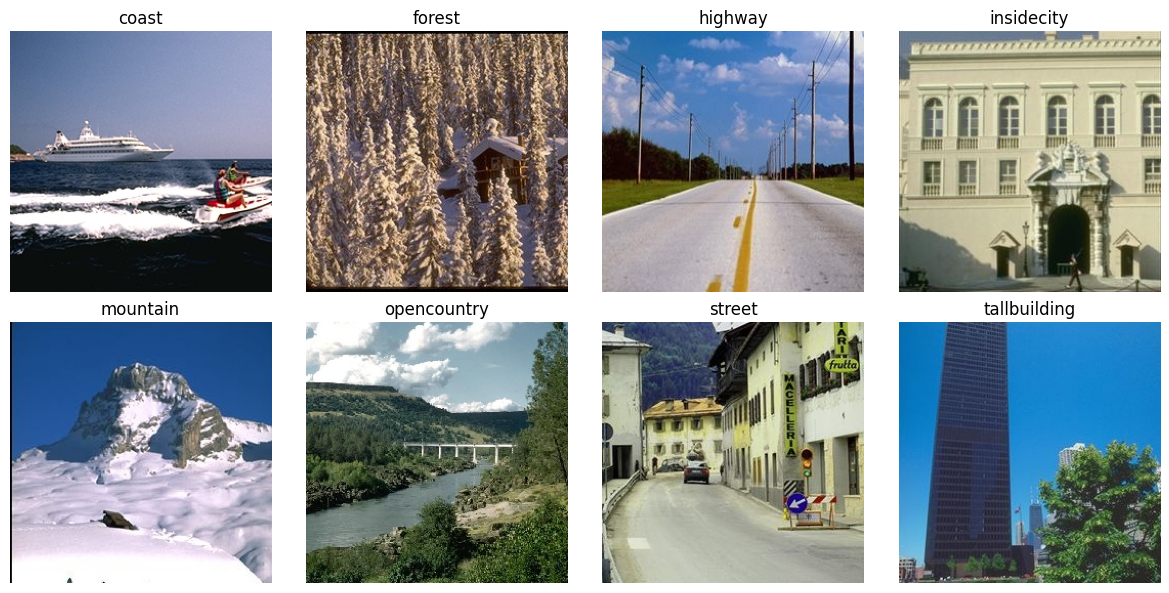

In [55]:
X, y, label_names = load_scenes()

unique_classes = np.unique(y)
class_images = {}

for i, label in enumerate(y):
    if label not in class_images:
        class_images[label] = X[i]
    if len(class_images) == len(unique_classes):
        break

num_classes = len(unique_classes)
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

for i, label in enumerate(unique_classes):
    row, col = divmod(i, 4)
    ax = axes[row, col]
    ax.imshow(class_images[label])
    ax.axis('off')
    ax.set_title(f"{label_names[i]}")

for i in range(len(unique_classes), 8):
    row, col = divmod(i, 4)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### 3. HOG features

Instead of working directly with image pixels (which would represent almost 200k dimensional features), we will be using an image feature descriptor called the Histogram of Oriented Gradients (HOG).

The principle of HOG is to compute a feature vector on several subregions of the image (called patches) for example of size 8x8. The image is then represented as a set of feature vectors corresponding to all patches.

The feature vectors computed are histograms of gradient orientations: the gradient of the image is computed (corresponding to its changes of intensity in each pixel), then the orientations of this gradient in each patch are accumulated into bins (here, we will be using 9 bins per patch).

In computer vision, HOG features are heavily related with the other well-known SIFT keypoints.

In [56]:
def hog_features(image, visualize):
    # Return a list of HOG features for a given image
    if visualize:
        features, hog_image= skimage.feature.hog(image, pixels_per_cell=(8, 8), cells_per_block=(1, 1),
                                   block_norm='L2-Hys', feature_vector=False, channel_axis=-1, visualize=True)
        features = features.reshape(-1, features.shape[-1])
        return features, hog_image
    else:
        features = skimage.feature.hog(image, pixels_per_cell=(8, 8), cells_per_block=(1, 1),
                                   block_norm='L2-Hys', feature_vector=False, channel_axis=-1, visualize=False)
        features = features.reshape(-1, features.shape[-1])
        return features

**(Question)** Compute HOG features for some images. Take a look at the feature vectors obtained and try to understand what the dimensions correspond to.

Original image shape: (256, 256, 3)
HOG features shape: (1024, 9)


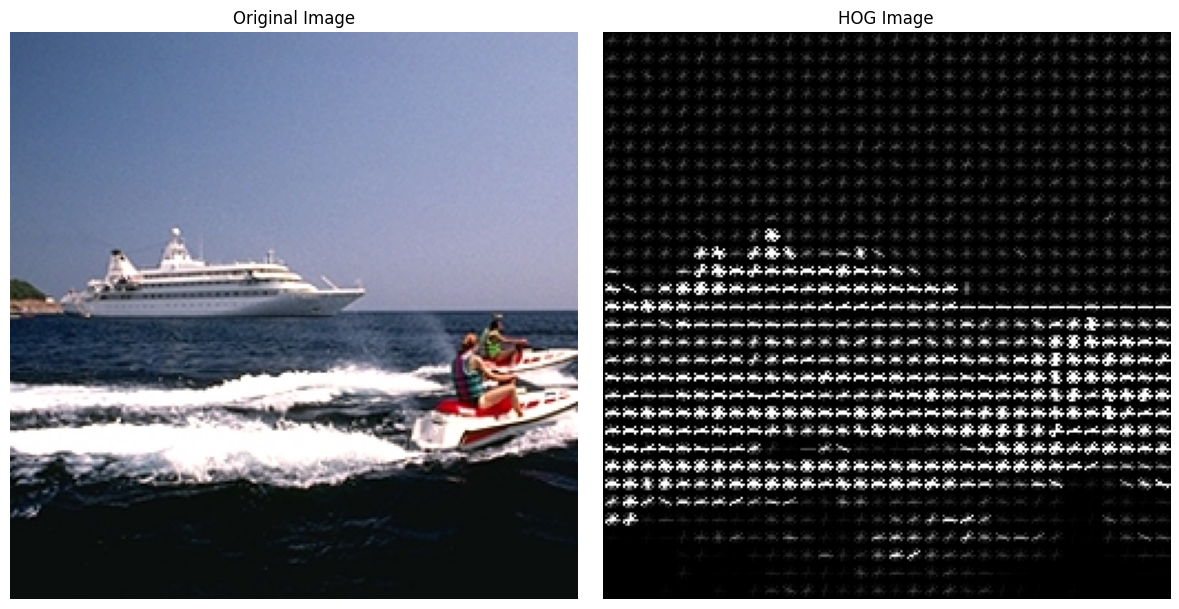

In [57]:
features, hog_image = hog_features(X[0], visualize=True)

print("Original image shape:", X[0].shape)
print("HOG features shape:", features.shape)

hog_image_rescaled = skimage.exposure.rescale_intensity(hog_image, in_range=(0, 10))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(X[0], cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax[1].set_title('HOG Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()

$256 / 8 = 32$ so 32 cells in width and height.

$32 * 32 = 1024$ so 1024 cells in total.

Each cell has 9 gradient directions

**(Question)** Compute HOG features for the whole dataset. If it takes too long, you can directly load them from the provided `hog.tgz` file.

In [58]:
hog_dataset = [hog_features(x, visualize=False) for x in X]

**(Question)** Split these features into train and test sets (for example 75% train, 25% test).

*Hint*: you can use the `train_test_split` method from `sklearn.model_selection`.

In [59]:
X_train_images, X_test_images, X_train_features, X_test_features, y_train, y_test = train_test_split(X, hog_dataset,
                                                                                                     y, test_size=0.25,
                                                                                                     random_state=42)

### 4. Bag of features

We will now implement the bag of features approach. It is composed on three main steps:
- Learn a vocabulary of visual words (also called codebook) using a clustering method (for example K-Means) applied on HOG features
- Project each feature of an image into the vocabulary, and build an histogram of these projections, giving a final single feature vector for the image
- Train an SVM classifier with these histograms of visual words as features for training images

**(Question)** Build the vocabulary of visual words with K-Means. The vocabulary size corresponds to the number of clusters.

In [60]:
def build_vocabulary(features, voc_size=100):
    # Cluster features into a visual vocabulary with K-Means algorithm,
    # then return the trained classified object.
    # You can use the MiniBatchKMeans class for very similar results 
    # but faster run time
    all_features = np.vstack(features)
    kmeans = MiniBatchKMeans(n_clusters=voc_size, random_state=42, batch_size=100)
    kmeans.fit(all_features)
    return kmeans

In [61]:
voc_size = 100
vocabulary = build_vocabulary(X_train_features, voc_size=voc_size)

In [62]:
assert vocabulary.n_clusters == 100
assert vocabulary.n_features_in_ == 9

**(Question)** Try to understand the `build_codebook` function below. Then, compute the histograms of visual words for features of the train and test sets. Store the results into `X_train` and `X_test` variables.

In [63]:
def build_codebook(features, vocabulary):
    # Given a vocabulary of visual words (KMeans classifier object),
    # compute the codebook (histogram) of the set of features for an image
    voc_size = len(vocabulary.cluster_centers_)
    codebook = np.zeros((len(features), voc_size))
    for i, f in enumerate(features):
        assignemnts = vocabulary.predict(f)
        for k in range(voc_size):
            codebook[i][k] = len(np.where(assignemnts == k)[0])
    codebook = codebook / codebook.sum(axis=1)[:, np.newaxis] # normalization
    return codebook

In [64]:
X_train = build_codebook(X_train_features, vocabulary)
X_test = build_codebook(X_test_features, vocabulary)

In [65]:
assert X_train.shape == (y_train.shape[0], 100)
assert X_test.shape == (y_test.shape[0], 100)

**(Question)** Explain what the `build_codebook` function does.

```build_codebook``` returns the codebook of all the features (per image) according to a vocabulary of visual words. In other terms, each row represents a set of features of an image (1024) and each column represents the number of features predicted in the cluster (word) corresponding to the column. Then it is normalized.

So this function creates a new dataset where each image has now 100 learned features (vocabulary length).

**(Question)** Train an SVM classifier with the histograms of visual words and report the classification results. Analyze the results and try to improve the classification results by adjusting the hyperparameters.

In [66]:
svc = SVC(kernel='rbf', C=10, random_state=42)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7693
Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.83      0.80        89
           2       0.86      0.87      0.86        89
           3       0.79      0.72      0.75        64
           4       0.78      0.69      0.74        72
           5       0.75      0.85      0.80        92
           6       0.74      0.66      0.70       110
           7       0.64      0.71      0.68        70
           8       0.84      0.80      0.82        86

    accuracy                           0.77       672
   macro avg       0.77      0.77      0.77       672
weighted avg       0.77      0.77      0.77       672

Confusion Matrix:
[[74  1  2  0  2  9  1  0]
 [ 0 77  0  0  6  6  0  0]
 [ 8  0 46  0  1  5  4  0]
 [ 0  0  1 50  0  2 13  6]
 [ 3  6  1  0 78  3  0  1]
 [12  6  4  1 14 73  0  0]
 [ 0  0  4  7  2  1 50  6]
 [ 0  0  0  6  1  0 10 69]]


In [67]:
svc_tuning = SVC()

params = {
    'C': np.arange(0.1, 10, 0.1),
    'kernel': np.array(['linear', 'poly', 'rbf', 'sigmoid']),
}

grid_search_model = GridSearchCV(estimator=svc_tuning, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)

grid_search_model.fit(X_train, y_train)

best_params = {k: float(v) if isinstance(v, np.float64) else str(v) if isinstance(v, np.str_) else v 
               for k, v in grid_search_model.best_params_.items()}

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", grid_search_model.best_score_)

Best Hyperparameters: {'C': 4.7, 'kernel': 'rbf'}
Best Accuracy: 0.7850005555349802


In [68]:
svc_tuned = SVC(C=best_params['C'], kernel=best_params['kernel'], random_state=42)
svc_tuned.fit(X_train, y_train)

y_pred_tuned = svc_tuned.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_tuned, zero_division=0))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))

Accuracy: 0.7768
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.88      0.83        89
           2       0.87      0.88      0.87        89
           3       0.80      0.73      0.76        64
           4       0.79      0.68      0.73        72
           5       0.76      0.85      0.80        92
           6       0.73      0.66      0.70       110
           7       0.65      0.71      0.68        70
           8       0.82      0.80      0.81        86

    accuracy                           0.78       672
   macro avg       0.78      0.77      0.77       672
weighted avg       0.78      0.78      0.78       672

Confusion Matrix:
[[78  1  1  0  1  7  1  0]
 [ 0 78  0  0  6  5  0  0]
 [ 5  0 47  0  2  6  4  0]
 [ 0  0  1 49  0  2 12  8]
 [ 2  4  2  0 78  6  0  0]
 [13  7  4  1 12 73  0  0]
 [ 0  0  4  6  2  1 50  7]
 [ 0  0  0  6  1  0 10 69]]


* First, we observe that the tuning of the hyperparameters makes us gain a bit less than $1\%$ of accuracy which is not that much but still encouraging when trying to build the best possible model.

* Then, looking at the classification report, several observations can be done:
    * The precision (defined as the ratio of true positive results to the total predicted positive) of each class is quiet close, except for class 7 (street), suggesting that this class is the most challenging to predict correctly (several images are predicted as street while it is not).

    * The recall (defined as the ratio of true positive results to the actual positive) is more spread. Indeed, for classes $1$, $2$, $5$ and $8$, we have a recall of $80\%$ or above, meaning that at least $80\%$ of the images of these classes have been "found" by the model. For the other classes, we have recall that is a bit lower, indicating that less images of the classes can be recognized by the model.

    * The F1-score (defned as the harmonic mean of precision and recall $\biggl( F1-score = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}\biggl)$) is a bit difficult to interpret physically and is therefore not ivestigated in depth.

    * The support is simply the number of occurence of each class in the test set.

    * Last, the difference between the macro and weighted averages is that the weighted average takes into account the number of instances per class (which does not have a big impact in this case).

* Finally, the confusion matrix contains the true classes on its rows (from $1$ to $8$) and the predicted classes on its columns (also from $1$ to $8$). Looking at the results, we can see which classes as "often" confused by the model. 
    * $\frac{12}{72}$ elements of Class $4$ are assumed as Class $7$ elements.

    * $\frac{13}{110}$ elements of Class $6$ are assumed as Class $1$ elements.

    * $\frac{12}{110}$ elements of Class $6$ are assumed as Class $5$ elements.

    * $\frac{10}{86}$ elements of Class $8$ are assumed as Class $7$ elements.

**(Question)** Propose a visualization of some of the visual words learned by your bag of features model.

The process will be 
* Random selection of "num_visual_words" of our vocabulary;

* For "extractes_per_word" extracts (patches) of each selected word, we will show the extract with its original image. 

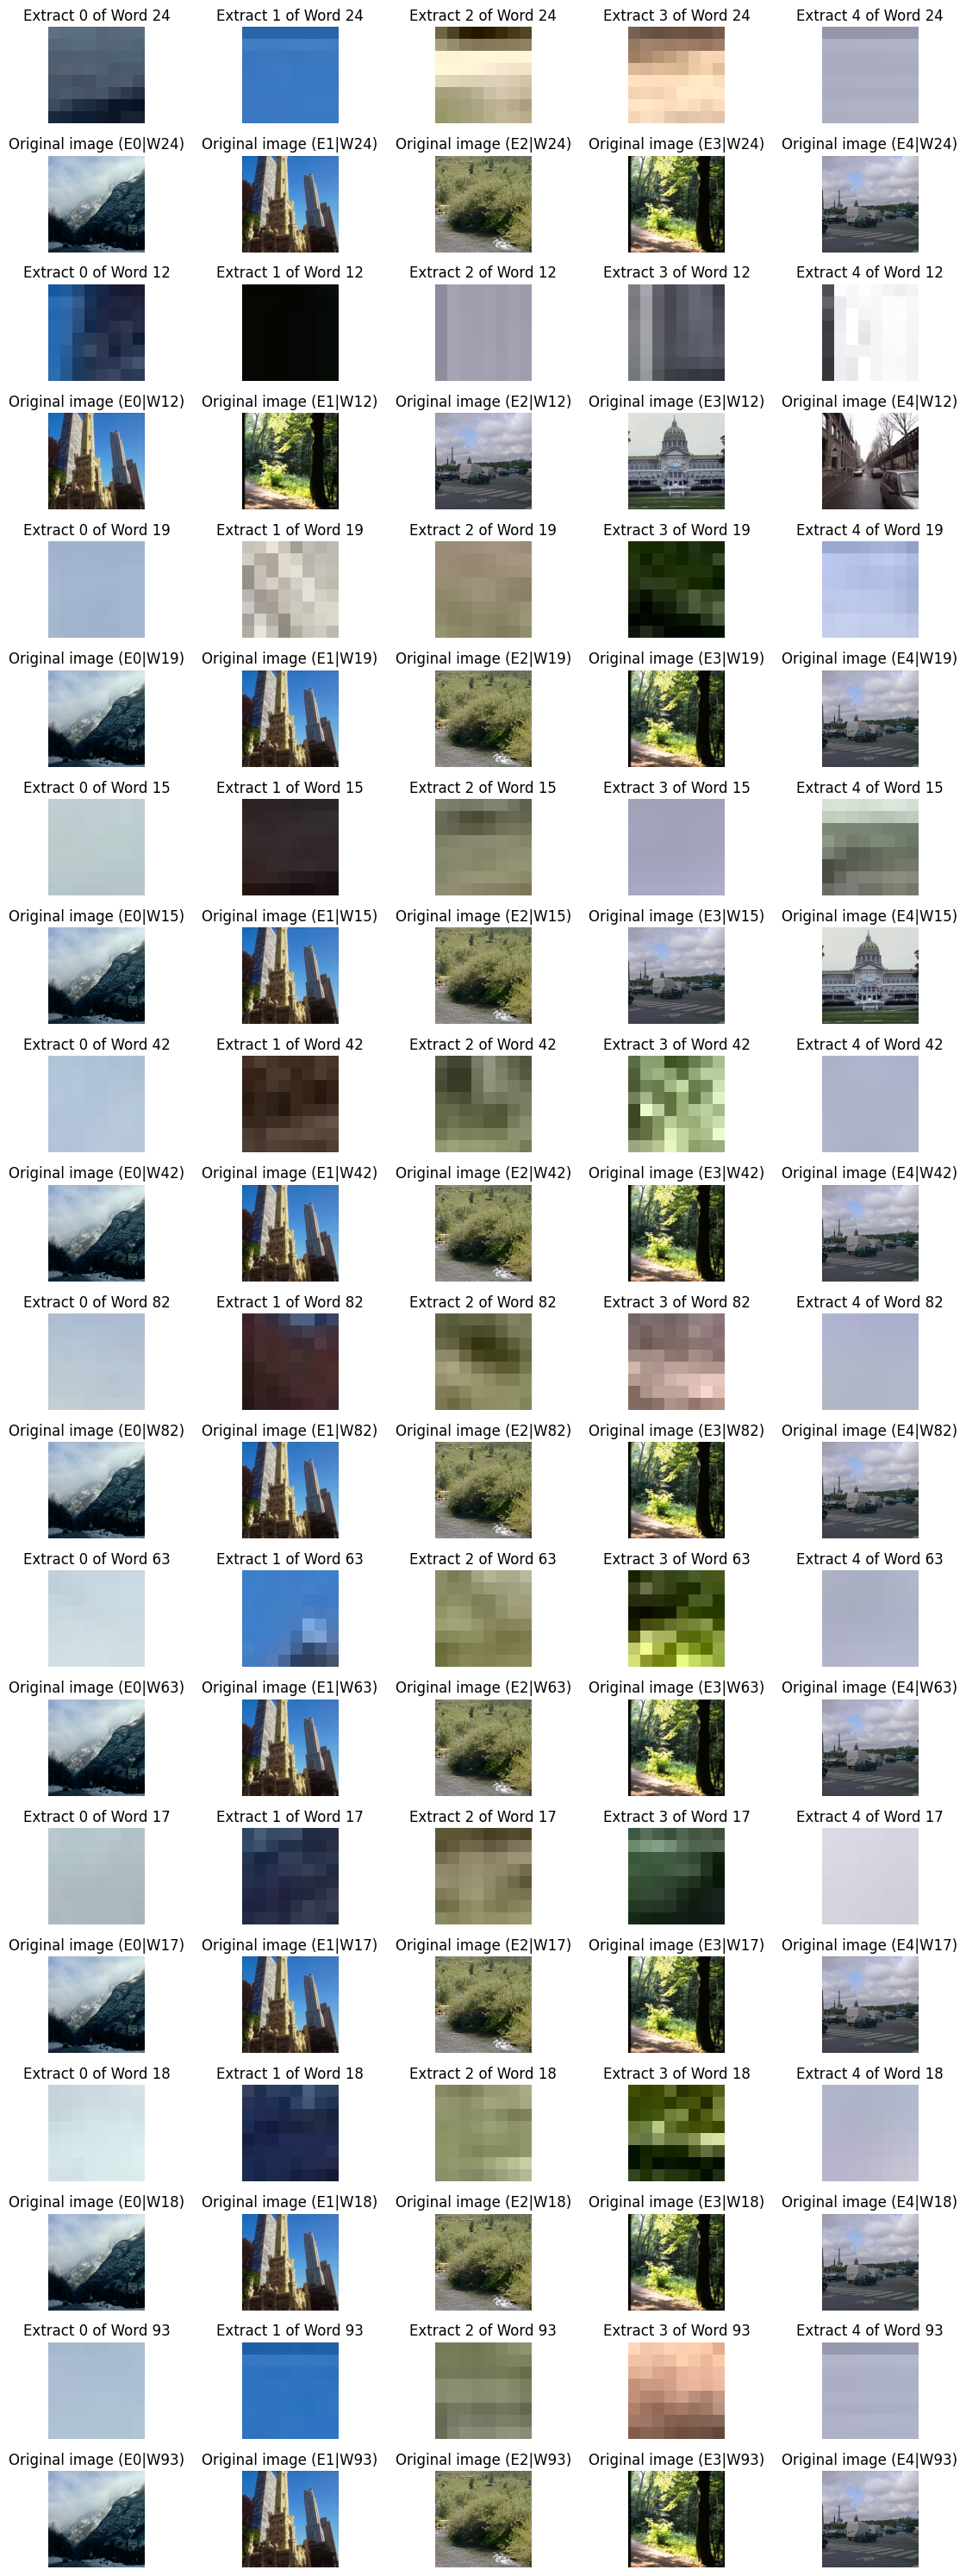

In [69]:
def visualize_visual_words(vocabulary, X_features, X_images, num_visual_words=10, extractes_per_word=5):
    selected_words = np.random.choice(vocabulary.n_clusters, num_visual_words, replace=False)

    predicted_images = [[] for _ in range(vocabulary.n_clusters)]
    for i in range(len(X_features)):
        pred = vocabulary.predict(X_features[i])
        for extract_number, p in enumerate(pred):
            row = (extract_number // 32) * 8
            col = (extract_number % 32) * 8
            
            # Ensure we stay within image boundaries
            if row + 8 <= X_images[i].shape[0] and col + 8 <= X_images[i].shape[1]:
                extract = X_images[i][row:row + 8, col:col + 8]
                predicted_images[p].append((extract, X_images[i]))

    fig, axes = plt.subplots(num_visual_words * 2, extractes_per_word, figsize=(12, 3 * num_visual_words))

    for idx, word in enumerate(selected_words):
        seen = set()
        extract_count = 0
        
        for extract, original_image in predicted_images[word]:
            if extract_count >= extractes_per_word:
                break

            if id(original_image) in seen:
                continue

            seen.add(id(original_image))

            ax_extract = axes[idx * 2, extract_count]
            ax_extract.imshow(extract)
            ax_extract.axis('off')
            ax_extract.set_title(f"Extract {extract_count} of Word {word}")

            ax_original = axes[idx * 2 + 1, extract_count]
            ax_original.imshow(original_image)
            ax_original.axis('off')
            ax_original.set_title(f"Original image (E{extract_count}|W{word})")
            
            extract_count += 1

    plt.tight_layout()

visualize_visual_words(vocabulary, X_train_features, X_train_images, num_visual_words=10, extractes_per_word=5)

For this second visualization, the process is the following:
* Store the extracts of each word together;

* For each word, mean the values of each pixel according to their coordinates (8x8, R, G, B);

* Show the mean of each word of our vocabulary.

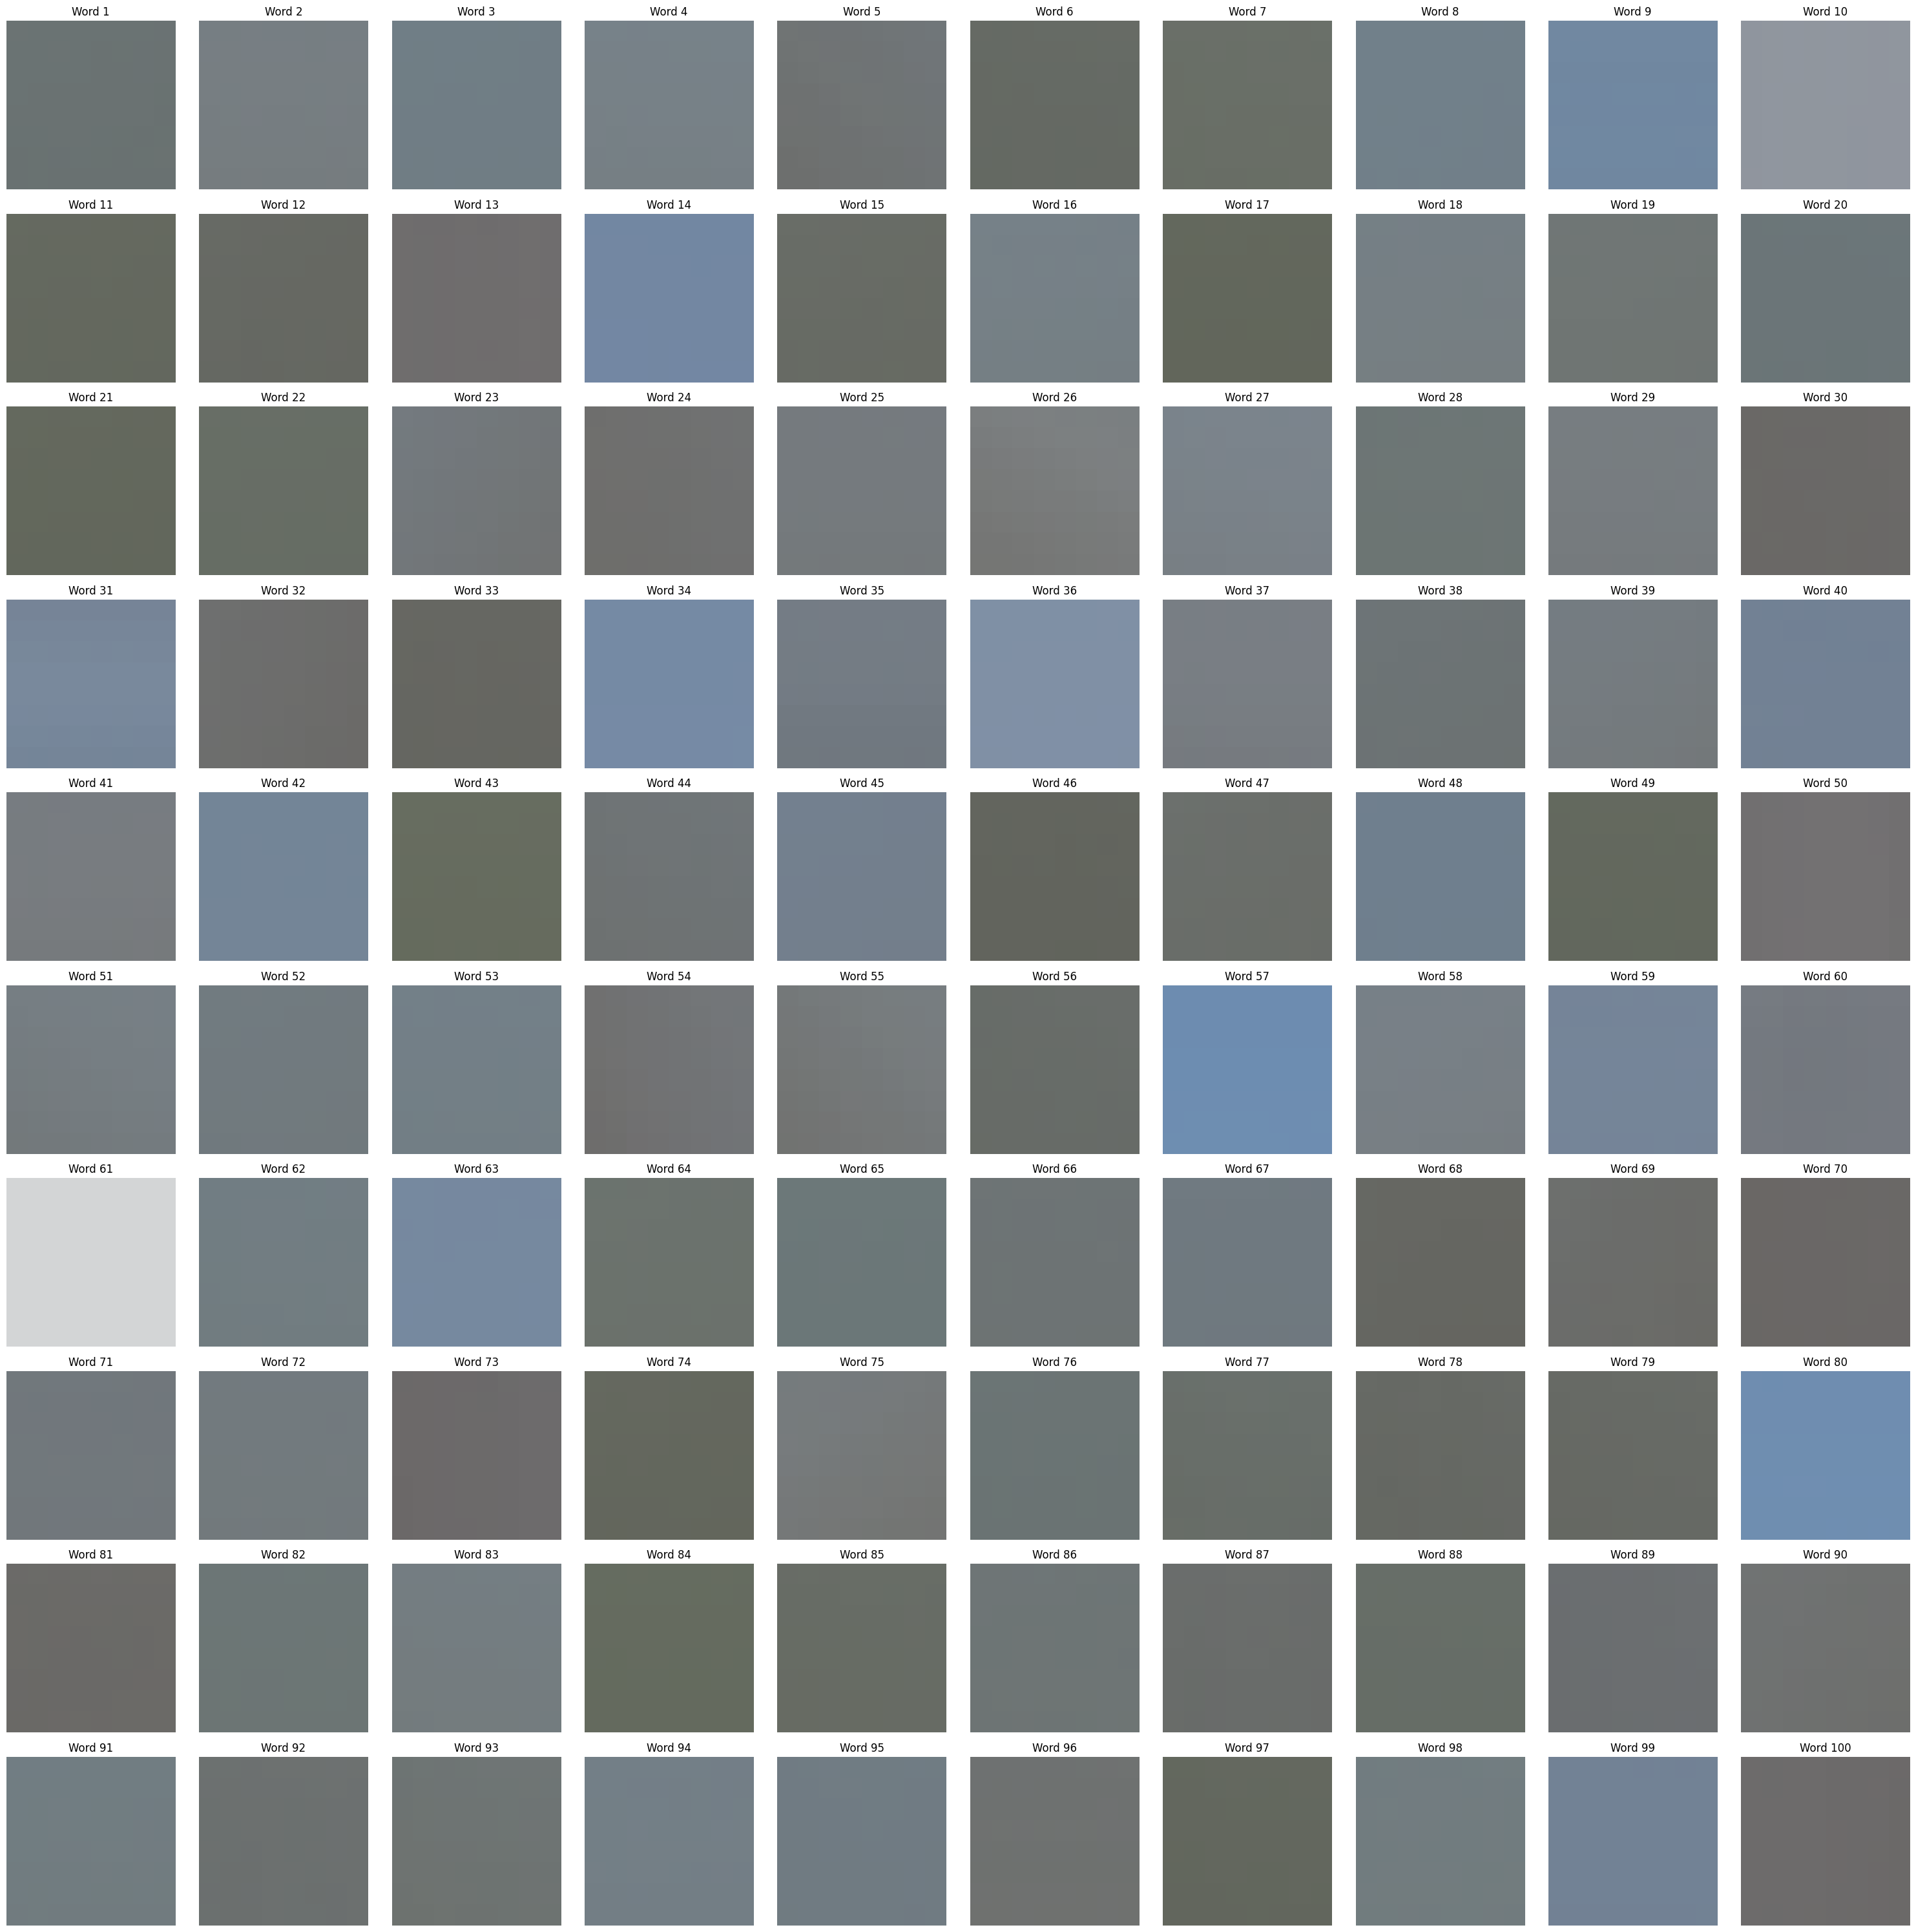

In [72]:
def mean_cluster(cluster_patches):
    cluster_patches = np.stack(cluster_patches, axis=0)
    mean_patch = np.mean(cluster_patches, axis=0)
    mean_patch = np.round(mean_patch).astype(np.uint8)
    return mean_patch

def visualize_mean_words(vocabulary, X_features, X_images):
    predicted_images = [[] for _ in range(vocabulary.n_clusters)]

    for i in range(len(X_features)):
        pred = vocabulary.predict(X_features[i])

        for extract_number, p in enumerate(pred):
            row = (extract_number // 32) * 8
            col = (extract_number % 32) * 8

            if row + 8 <= X_images[i].shape[0] and col + 8 <= X_images[i].shape[1]:
                extract = X_images[i][row:row + 8, col:col + 8]
                predicted_images[p].append(extract)

    mean_images = {}
    for word in range(vocabulary.n_clusters):
        if predicted_images[word]:
            mean_images[word] = mean_cluster(predicted_images[word])

    fig, axes = plt.subplots(10, 10, figsize=(30, 30))
    axes = axes.flatten()

    for word in range(vocabulary.n_clusters):
        if word < 100:
            if word in mean_images:
                ax = axes[word]
                ax.imshow(mean_images[word])
                ax.axis('off')
                ax.set_title(f"Word {word+1}")

    plt.tight_layout()
    plt.show()

visualize_mean_words(vocabulary, X_train_features, X_train_images)

Looking at these means of pixels, we are not able to conclude anything visually because of the small scale (each word is composed of $8 \times 8$ pixels which is small and not visible to the naked eye). But statistically, when printing the values of the means, we observed that the values were not all the same and had some fluctuations. Therefore, we assume that the model is able to interpret these small variations between the clusters to make the classifications with an acceptable accuracy ($\approx 80\%$).